# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head(10)

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0
5,2017,4,REPUBLIC NATIONAL DISTRIBUTING CO,101680,MANISCHEWITZ CREAM WH CONCORD - 1.5L,WINE,0.0,1.0,0.0
6,2017,4,ROYAL WINE CORP,101753,BARKAN CLASSIC PET SYR - 750ML,WINE,0.0,1.0,0.0
7,2017,4,JIM BEAM BRANDS CO,10197,KNOB CREEK BOURBON 9YR - 100P - 1.75L,LIQUOR,0.0,32.0,0.0
8,2017,4,STE MICHELLE WINE ESTATES,101974,CH ST MICH P/GRIS - 750ML,WINE,0.0,26.0,0.0
9,2017,4,MONSIEUR TOUTON SELECTION,102083,CH DE LA CHESNAIE MUSCADET - 750ML,WINE,0.0,1.0,0.0


In [9]:
data.columns.values

array(['Year', 'Month', 'Supplier', 'ItemCode', 'Description', 'ItemType',
       'RetailSales', 'RetailTransfers', 'WarehouseSales'], dtype=object)

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

             RetailSales  RetailTransfers  WarehouseSales
ItemType                                                 
BEER           209763.11        234924.44      2437617.32
DUNNAGE             0.00             0.00       -45331.00
KEGS                0.00             0.00        43558.00
LIQUOR         309847.85        334176.41        33173.32
NON-ALCOHOL      8109.97          9058.37         8656.72


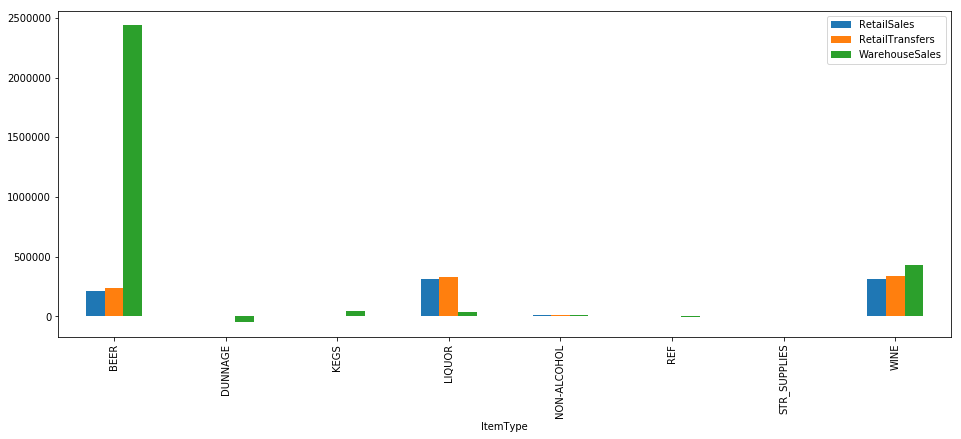

In [121]:
#data.groupby(["RetailSales", "RetailTransfers", "WarehouseSales"], as_index=False).agg({'ItemType': 'sum'})
data_sum = data[["RetailSales", "RetailTransfers", "WarehouseSales", "ItemType"]].groupby(["ItemType"]).agg("sum")
print(data_sum.head())
data_sum.plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

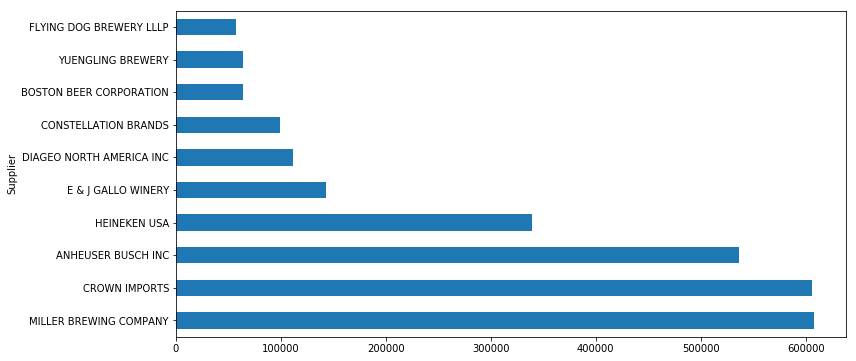

In [36]:
data_sum = data[["RetailSales", "WarehouseSales", "Supplier"]].groupby(["Supplier"]).agg("sum")
data_sum['SalesMix'] = data_sum['RetailSales'] + data_sum['WarehouseSales']
#pd.DataFrame(data_sum)
result = data_sum['SalesMix'].sort_values(ascending=False).head(10)
#print(result)

plt.rcParams['figure.figsize'] = (12, 6)
result.plot.barh()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

   Month  RetailSales  RetailTransfers
0      1     5.679413         5.574833
1      2     5.939247         6.050136
2      4     0.000000        15.707503
3      5     7.038838         7.421817
4      6     7.143914         6.950396
5      8     6.409991         6.584726
6      9     6.757254         6.419721
7     10     6.549021         6.827827
8     11     6.765496         7.103699
9     12     9.078241         8.353759


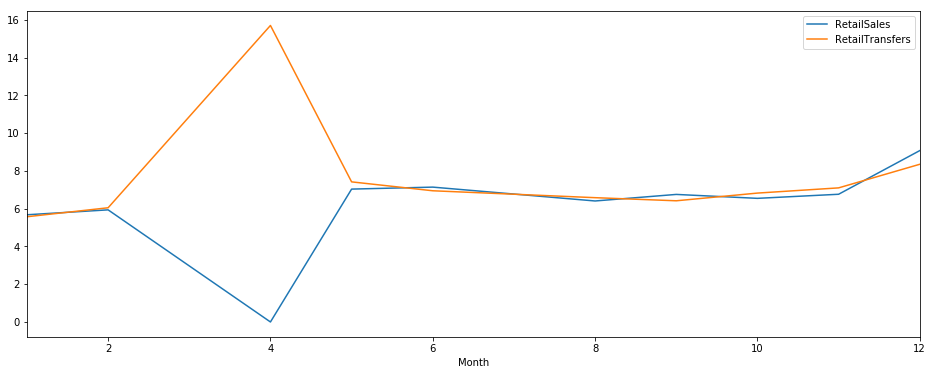

In [122]:
data1 = data.groupby('Month', as_index=False).agg({'RetailSales': 'mean', 'RetailTransfers': 'mean'})
print(data1)
#print(data1.sort_values(by=["Month", "RetailSales", "RetailTransfers"], inplace=True))
data1.plot(x="Month", y=["RetailSales", "RetailTransfers"])


## 4. Plot the same information as above but as a bar chart.

       RetailSales  RetailTransfers
Month                              
1         5.679413         5.574833
2         5.939247         6.050136
4         0.000000        15.707503
5         7.038838         7.421817
6         7.143914         6.950396


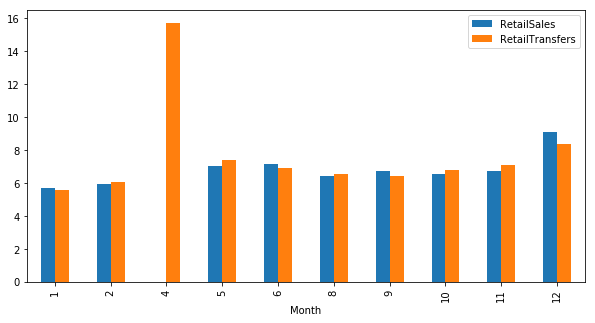

In [123]:
data1.set_index('Month', inplace=True)
print(data1.head())
plt.rcParams['figure.figsize'] = (10, 5)
data1.plot.bar()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

        ItemType  Month  Year  RetailSales     Date
42   NON-ALCOHOL     10  2017       945.63  2017/10
70          WINE     10  2017     33108.76  2017/10
15       DUNNAGE     10  2017         0.00  2017/10
51           REF     10  2017        22.82  2017/10
23          KEGS     10  2017         0.00  2017/10
60  STR_SUPPLIES     10  2017        84.38  2017/10
7           BEER     10  2017     22583.78  2017/10
33        LIQUOR     10  2017     32491.59  2017/10
71          WINE     11  2017     38275.92  2017/11
43   NON-ALCOHOL     11  2017      1005.19  2017/11
34        LIQUOR     11  2017     35524.77  2017/11
8           BEER     11  2017     23341.14  2017/11
16       DUNNAGE     11  2017         0.00  2017/11
52           REF     11  2017        63.11  2017/11
24          KEGS     11  2017         0.00  2017/11
61  STR_SUPPLIES     11  2017       106.06  2017/11
35        LIQUOR     12  2017     49522.28  2017/12
62  STR_SUPPLIES     12  2017       439.64  2017/12
72          

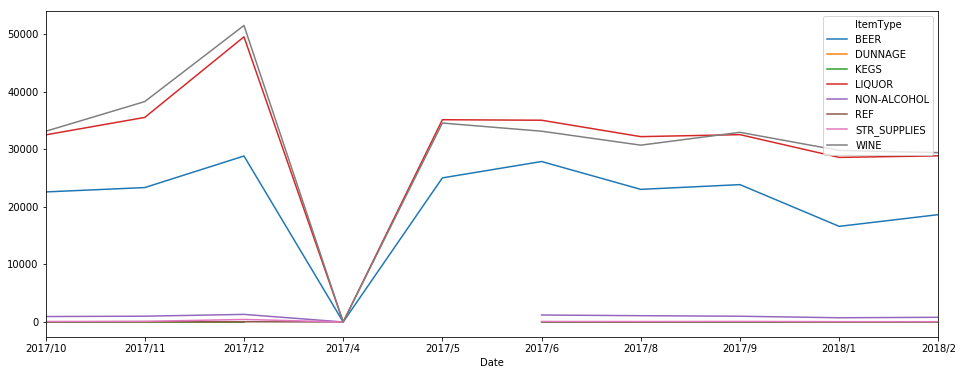

In [148]:

data1 = data.groupby(['ItemType', 'Month', 'Year'], as_index=False).agg({'RetailSales': 'sum'})
data1['Date'] = data1['Year'].map(str) + '/' + data1['Month'].map(str)
data1.sort_values(by=['Date'], inplace=True)

print(data1.head(20))
data1.pivot_table(index=['Date'],columns='ItemType',values='RetailSales',aggfunc='sum').plot()



## 6. Plot the same information as above but as a bar chart.

       ItemType  Month  Year  RetailSales     Date
42  NON-ALCOHOL     10  2017       945.63  2017/10
70         WINE     10  2017     33108.76  2017/10
15      DUNNAGE     10  2017         0.00  2017/10
51          REF     10  2017        22.82  2017/10
23         KEGS     10  2017         0.00  2017/10


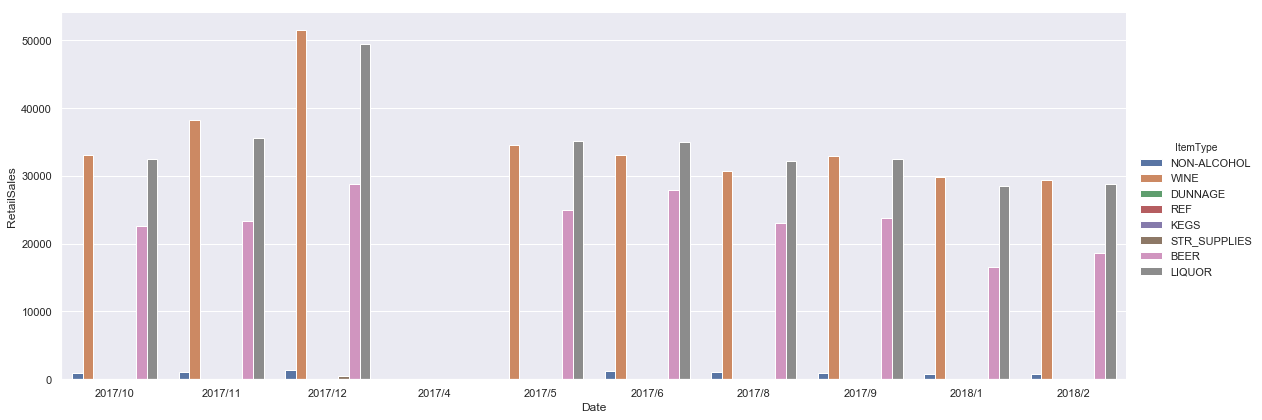

In [152]:
#data1.set_index(['Date', 'ItemType'], inplace=True)

print(data1.head())
sns.catplot(x='Date', y='RetailSales', hue='ItemType', data=data1, kind='bar', height=6, aspect=16/6)

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

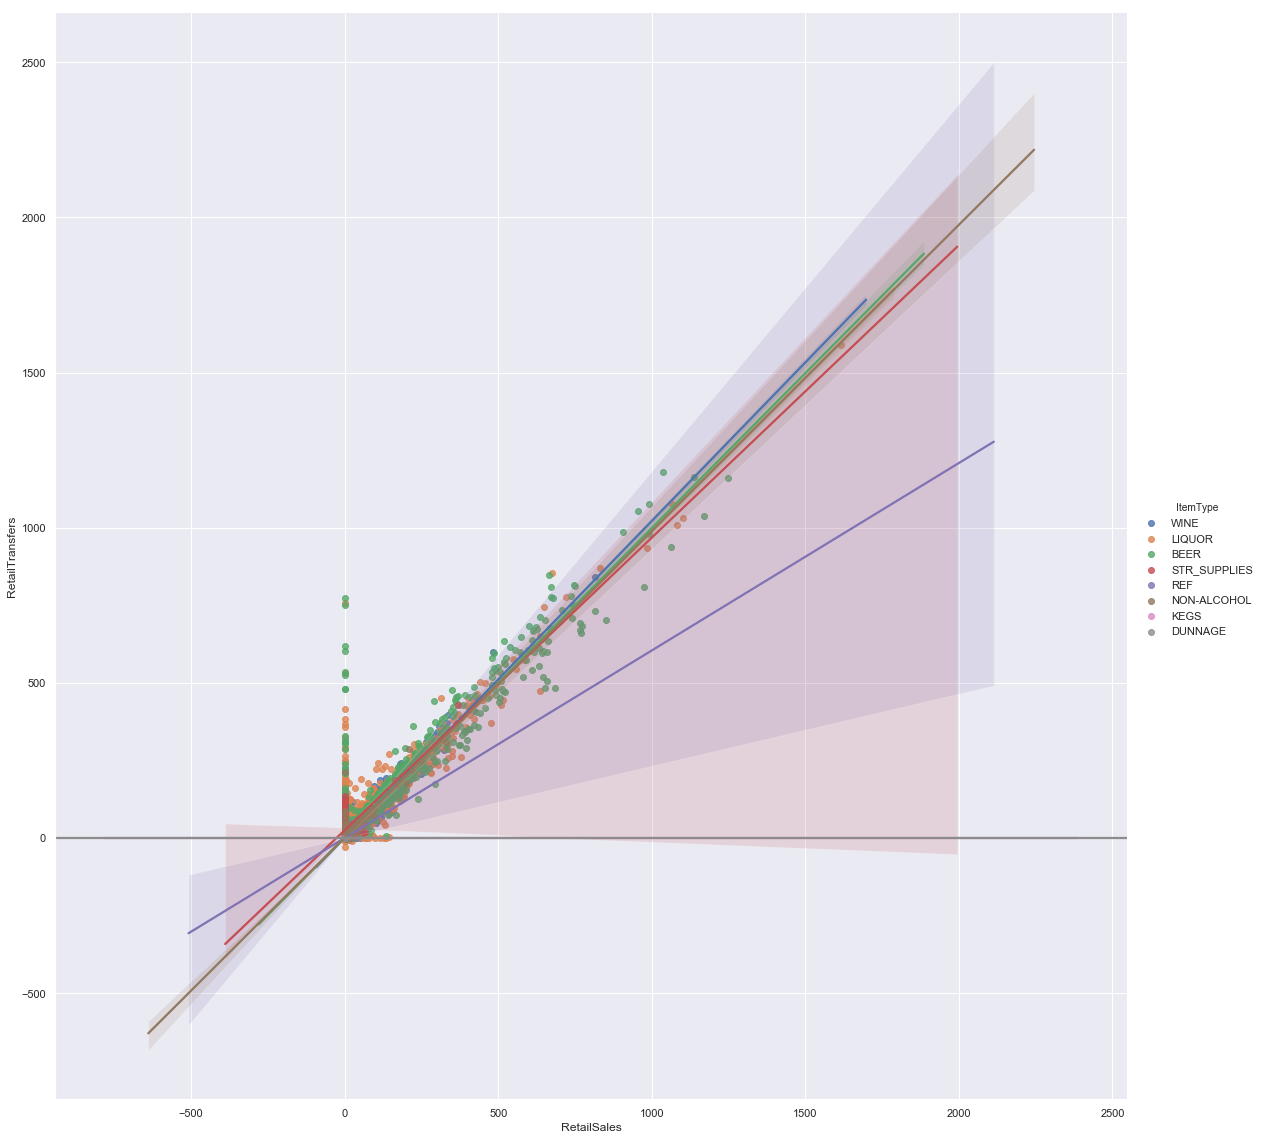

In [165]:
sns.lmplot(x="RetailSales", y="RetailTransfers", hue="ItemType", data=data, height=16, aspect=16/16)


## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

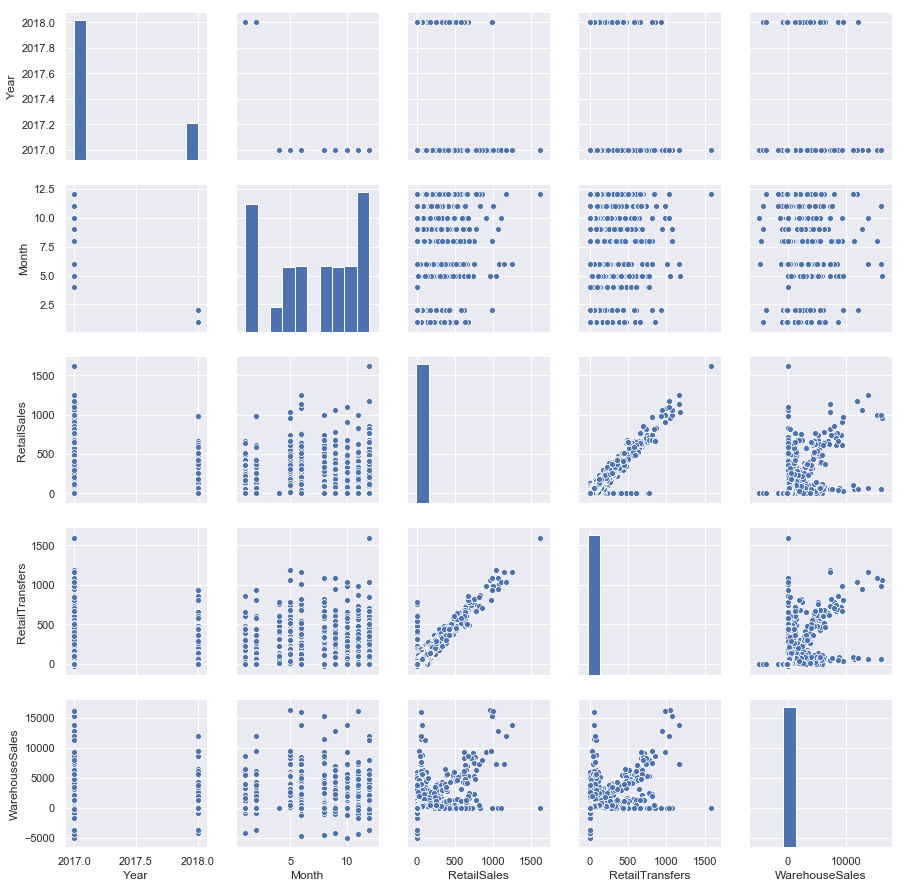

In [170]:
df = data.select_dtypes(exclude=object)
#df
sns.pairplot(df)


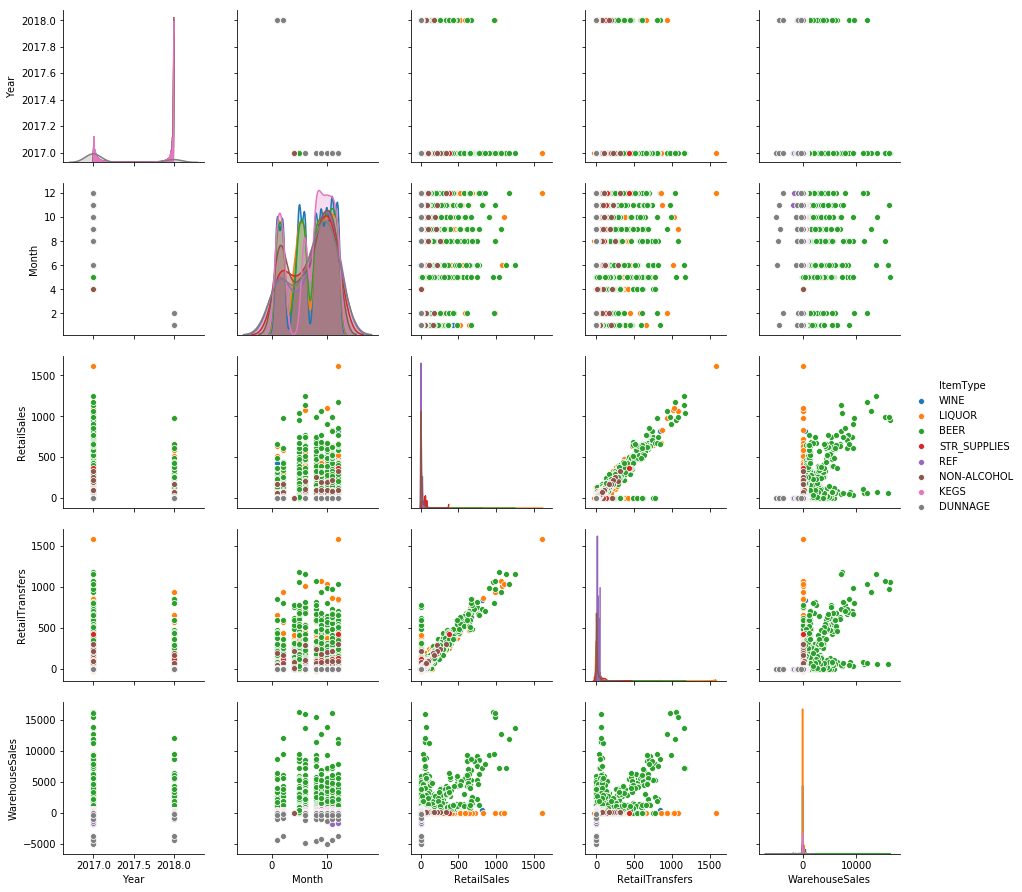

In [5]:

data.dtypes
df = pd.concat([data.select_dtypes(exclude=object), data['ItemType']], axis=1) 
df.head(10)
sns.pairplot(df, hue="ItemType")